# Introducción a la Visualización de Redes

En este notebook aprenderemos a visualizar redes con el módulo `aves` a través de [graphtool](http://graph-tool.skewed.de/), una biblioteca para trabajar con redes en Python.

Los propósitos de esta clase son los siguientes:

  1. Cargar una red.
  2. Explorar como visualizarla.
  3. Definir una tarea y usar visualización para responderla.
  
Como data set de prueba utilizaremos la Red de Jazz que se encuentra en [Colección de Redes de Koblenz](http://konect.uni-koblenz.de/networks/arenas-jazz). Ya está incluida en el repositorio `aves`, en la carpeta `data/external/arenas-jazz`.


## Carga de Datos

In [1]:
DATA_PATH = "data"

In [2]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import streamlit as st

In [4]:
company_surname_count_df = pd.read_csv(
    f"{DATA_PATH}/company_surname_count.csv",
)

company_surname_count_df.sort_values('conteo', ascending=False).head()

,Nombre_empresa,Apellido,conteo
7359,MELON S.A.,BRESCIA,12
2861,COMPAÑIA DE INVERSIONES LA ESPAÑOLA S.A.,GARCIA,7
8837,SIPSA SOCIEDAD ANONIMA,MENENDEZ,7
6754,INVERSIONES HISPANIA S.A.,GARCIA,6
399,AGROSUPER S.A.,VIAL,6


In [5]:
high_freq_company_surname_freq = company_surname_count_df[company_surname_count_df["conteo"] > 4]
high_freq_company_surname_freq

,Nombre_empresa,Apellido,conteo
399,AGROSUPER S.A.,VIAL,6
723,ANDACOR S.A.,LEATHERBEE,5
1027,BANCOESTADO S.A. ADMINISTRADORA GENERAL DE FONDOS,ADVANI,5
2861,COMPAÑIA DE INVERSIONES LA ESPAÑOLA S.A.,GARCIA,7
2983,COMPAÑIA INDUSTRIAL EL VOLCAN S.A.,LARRAIN,5
3127,CONTEMPORA CORREDORES DE BOLSA DE PRODUCTOS S.A.,SILVA,5
4986,ENGIE ENERGIA CHILE S.A.,DE,5
5051,ENJOY S.A.,MARTINEZ,5
5307,FALABELLA S.A.,SOLARI,6
5670,GOLF Y DEPORTES LOMAS DE LA DEHESA S.A.,OSSANDON,5


In [ ]:
# Guardamos el dataframe
# high_freq_company_surname_freq.to_csv(f"data/high_freq.csv")

In [ ]:
# Crear un grafo bipartito
G = nx.Graph()

data = high_freq_company_surname_freq

# Añadir nodos para cada conjunto (empresas y apellidos)
empresas = data['Nombre_empresa'].unique()
apellidos = data['Apellido'].unique()

# Añadir nodos con el atributo 'bipartite'
G.add_nodes_from(empresas, type='empresa')  # conjunto de empresas
G.add_nodes_from(apellidos, type='apellido')  # conjunto de apellidos

# Añadir aristas con pesos basados en el conteo
for _, row in data.iterrows():
    empresa = row['Nombre_empresa']
    apellido = row['Apellido']
    conteo = row['conteo']
    G.add_edge(empresa, apellido, weight=conteo)
    
# Ajustar layout
pos = nx.spring_layout(G, seed=42)

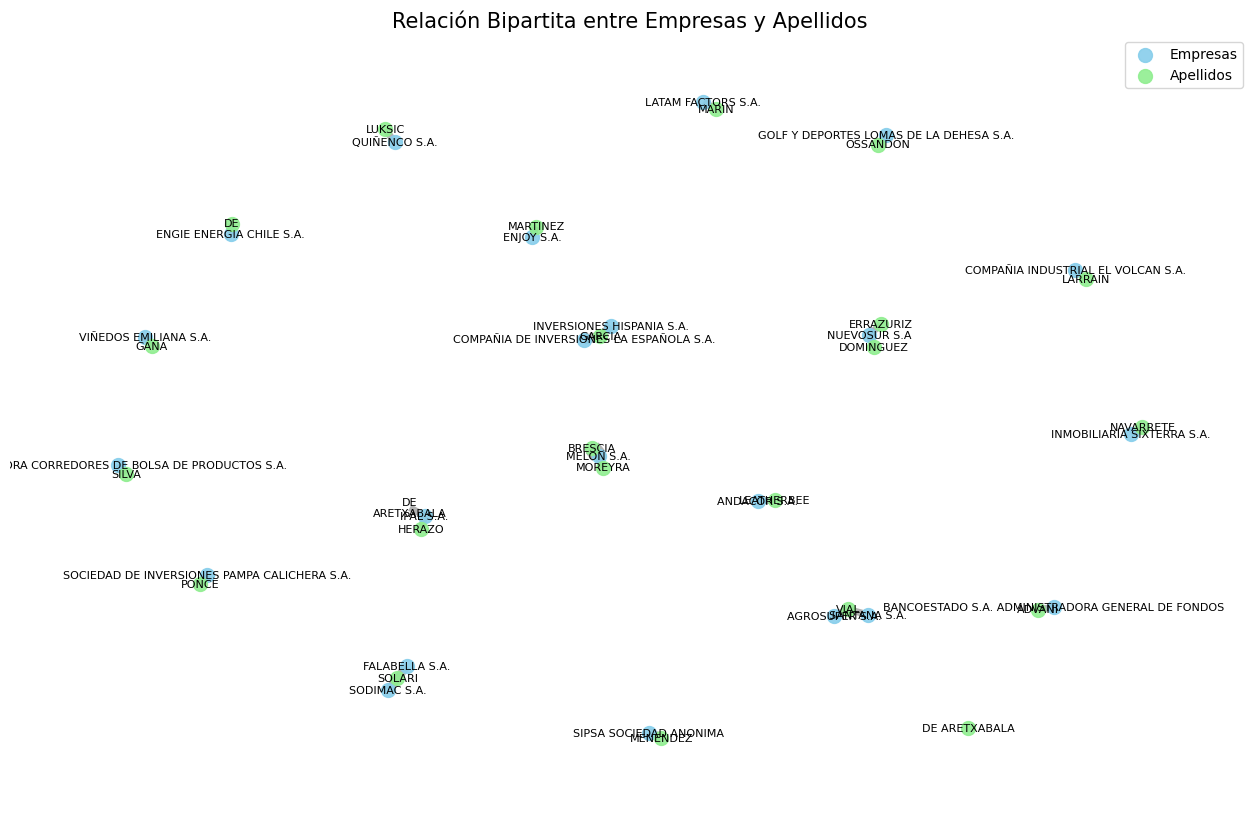

In [ ]:
# Tamaño de los nodos y grosor de las aristas
node_size = 100
edgewidth = [G[u][v]['weight'] for u, v in G.edges()]


plt.figure(figsize=(16, 10))

# Dibujar nodos y bordes
nx.draw_networkx_nodes(G, pos, nodelist=empresas, node_color="skyblue", node_size=node_size, alpha=0.9, label="Empresas")
nx.draw_networkx_nodes(G, pos, nodelist=apellidos, node_color="lightgreen", node_size=node_size, alpha=0.9, label="Apellidos")
nx.draw_networkx_edges(G, pos, width=edgewidth, alpha=0.6, edge_color="gray")

# Dibujar etiquetas con tamaño y rotación ajustados
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color="black", font_family="sans-serif")

# Título y leyenda
plt.title("Relación Bipartita entre Empresas y Apellidos", fontsize=15)
plt.legend(scatterpoints=1, loc="upper right", fontsize=10)
plt.axis("off")
plt.show()


In [ ]:
import plotly.graph_objects as go

df = high_freq_company_surname_freq

# Crear los datos de los nodos para Plotly
empresa_nodes = [node for node, attrs in G.nodes(data=True) if attrs['type'] == 'empresa']
apellido_nodes = [node for node, attrs in G.nodes(data=True) if attrs['type'] == 'apellido']

# Crear las posiciones de los nodos en Plotly
node_x = []
node_y = []
node_text = []
node_color = []

for node in G.nodes:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_color.append('blue' if node in empresa_nodes else 'green')

# Crear las aristas en Plotly
edge_x = []
edge_y = []
edge_width = []

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_width.append(edge[2]['weight'])

# Crear las figuras de Plotly
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        color=node_color,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Count',
            xanchor='left',
            titleside='right'
        )
    )
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Red de Empresas y Apellidos de Directivos',
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

fig.show()
